# MIMIC-III Pipeline
In this notebook, we are going to show case the mimic pipeline for each task.

In [1]:
import pdb
import os
import json
from pathlib import Path
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import AUC

import datasets.mimic
from preprocessing.mimic import Preprocessor
from preprocessing import Discretizer, BatchGenerator, Normalizer
from models.lstm import LSTMNetwork
from utils.IO import *
from importlib import reload
import pipeline.mimic as pipeline

2022-07-31 12:53:44.555848: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-31 12:53:47.056425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 12:53:47.061108: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 12:53:47.061308: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
(timeseries,
 episodic_data,
 subject_events,
 subject_diagnoses,
 subject_icu_history) = datasets.mimic.load_data(path=Path(os.getenv("DATA"), "mimic-iii-demo"))

INFO - 2022-07-31 12:53:47:datasets/mimic.py:L 51 - task data


## Decompensation

In [3]:
model_config = {
    "layer_size": 128,
    "input_dim": 59,
    "depth": 1,
    "dropout_rate": 0,
    "task": "decompensation"
}

pipeline_config = {
    "model_name": "lstm_default",
    "batch_size": 8,
    "epochs": 5,
    "validation_fraction_split": 0.2,
    "test_fraction_split": 0.2,
    "task": "decompensation",
    "output_type": "one-hot",
    "compiler_config" : {
        "optimizer": "adam",
        "metrics": [
            AUC(curve='ROC'), 
            AUC(curve='PR')
        ],
        "loss": "binary_crossentropy",
        "run_eagerly": True
    }
}

2022-07-31 12:53:53.580192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-31 12:53:53.580801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 12:53:53.581106: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 12:53:53.581253: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

In [4]:
model = LSTMNetwork(**model_config)

In [6]:
pipe = pipeline.MIMICPipeline(model, **pipeline_config)
model, history = pipe.fit(timeseries,
                          episodic_data,
                          subject_diagnoses,
                          subject_icu_history)

INFO - 2022-07-31 12:53:54:pipeline/mimic.py:L 132 - Preprocessing data.
INFO - 2022-07-31 12:53:54:preprocessing/mimic.py:L 60 - Only type available for this task is binary! Argument disregarded
INFO - 2022-07-31 12:53:55:pipeline/mimic.py:L 147 - Done.
INFO - 2022-07-31 12:53:55:pipeline/mimic.py:L 148 - Splitting Dataset.
INFO - 2022-07-31 12:53:56:pipeline/mimic.py:L 106 - Done.
INFO - 2022-07-31 12:53:56:pipeline/mimic.py:L 112 - Starting model run for model: lstm_default!
INFO - 2022-07-31 12:53:57:preprocessing/__init__.py:L 464 - Done computing new normalizer in 1.8821079730987549!
Model: "lstm_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x (InputLayer)              [(None, None, 59)]        0         
                                                                 
 masking (Masking)           (None, None, 59)          0         
                                                   

2022-07-31 12:53:58.945911: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


837/837 [==============================] - ETA: 0s - loss: 0.1645 - auc: 0.7369 - auc_1: 0.1282

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/decompensation/cp-0001.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/decompensation/cp-0001.ckpt/assets


837/837 [==============================] - 65s 76ms/step - loss: 0.1645 - auc: 0.7369 - auc_1: 0.1282 - val_loss: 0.2567 - val_auc: 0.6909 - val_auc_1: 0.1120 - lr: 0.0010
Epoch 2/5
837/837 [==============================] - ETA: 0s - loss: 0.1286 - auc: 0.7901 - auc_1: 0.2515

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/decompensation/cp-0002.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/decompensation/cp-0002.ckpt/assets


837/837 [==============================] - 64s 76ms/step - loss: 0.1286 - auc: 0.7901 - auc_1: 0.2515 - val_loss: 0.2745 - val_auc: 0.7088 - val_auc_1: 0.1460 - lr: 0.0010
Epoch 3/5
837/837 [==============================] - ETA: 0s - loss: 0.1169 - auc: 0.8147 - auc_1: 0.3828

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/decompensation/cp-0003.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/decompensation/cp-0003.ckpt/assets


837/837 [==============================] - 83s 99ms/step - loss: 0.1169 - auc: 0.8147 - auc_1: 0.3828 - val_loss: 0.2580 - val_auc: 0.7742 - val_auc_1: 0.1957 - lr: 0.0010
Epoch 4/5
836/837 [============================>.] - ETA: 0s - loss: 0.1157 - auc: 0.7953 - auc_1: 0.4101

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/decompensation/cp-0004.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/decompensation/cp-0004.ckpt/assets


837/837 [==============================] - 48s 58ms/step - loss: 0.1156 - auc: 0.7951 - auc_1: 0.4100 - val_loss: 0.2291 - val_auc: 0.8065 - val_auc_1: 0.1988 - lr: 0.0010
Epoch 5/5
837/837 [==============================] - ETA: 0s - loss: 0.1023 - auc: 0.8841 - auc_1: 0.4864

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/decompensation/cp-0005.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/decompensation/cp-0005.ckpt/assets


837/837 [==============================] - 50s 60ms/step - loss: 0.1023 - auc: 0.8841 - auc_1: 0.4864 - val_loss: 0.2209 - val_auc: 0.8210 - val_auc_1: 0.3324 - lr: 0.0010
INFO - 2022-07-31 12:59:08:pipeline/mimic.py:L 256 - Training complete.


INFO - 2022-07-31 12:59:08:pipeline/mimic.py:L 268 - Evaluating model.
284/284 [==============================] - 9s 32ms/step - loss: 0.1458 - auc: 0.6722 - auc_1: 0.0740
INFO - 2022-07-31 12:59:18:pipeline/mimic.py:L 275 - Evaluation complete.


[0.14581145346164703, 0.672200620174408, 0.07402412593364716]

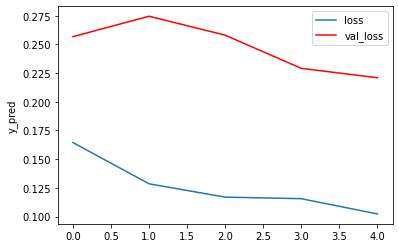

In [7]:
pipe.score()

## In Hospital Mortality

In [8]:
model_config = {
    "layer_size": 128,
    "input_dim": 59,
    "depth": 1,
    "dropout_rate": 0,
    "task": "in_hospital_mortality"
}

pipeline_config = {
    "model_name": "lstm_default",
    "batch_size": 8,
    "epochs": 5,
    "validation_fraction_split": 0.2,
    "test_fraction_split": 0.2,
    "task": "in_hospital_mortality",
    "output_type": "one-hot",
    "compiler_config" : {
        "optimizer": "adam",
        "metrics": [
            AUC(curve='ROC'), 
            AUC(curve='PR')
        ],
        "loss": "binary_crossentropy",
        "run_eagerly": True
    }
}

In [9]:
model = LSTMNetwork(**model_config)
pipe = pipeline.MIMICPipeline(model, **pipeline_config)
model, history = pipe.fit(timeseries,
                          episodic_data,
                          subject_diagnoses,
                          subject_icu_history)

INFO - 2022-07-31 12:59:19:pipeline/mimic.py:L 132 - Preprocessing data.
INFO - 2022-07-31 12:59:19:preprocessing/mimic.py:L 60 - Only type available for this task is binary! Argument disregarded
INFO - 2022-07-31 12:59:20:pipeline/mimic.py:L 147 - Done.
INFO - 2022-07-31 12:59:20:pipeline/mimic.py:L 148 - Splitting Dataset.
INFO - 2022-07-31 12:59:20:pipeline/mimic.py:L 106 - Done.
INFO - 2022-07-31 12:59:20:pipeline/mimic.py:L 112 - Starting model run for model: lstm_default!
INFO - 2022-07-31 12:59:23:preprocessing/__init__.py:L 464 - Done computing new normalizer in 3.136474132537842!
Model: "lstm_network_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x (InputLayer)              [(None, None, 59)]        0         
                                                                 
 masking_1 (Masking)         (None, None, 59)          0         
                                                  

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/in_hospital_mortality/cp-0001.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/in_hospital_mortality/cp-0001.ckpt/assets


57/57 [==============================] - 16s 283ms/step - loss: 0.5744 - auc_2: 0.6852 - auc_3: 0.6031 - val_loss: 0.5128 - val_auc_2: 0.8000 - val_auc_3: 0.4407 - lr: 0.0010
Epoch 2/5
57/57 [==============================] - ETA: 0s - loss: 0.3001 - auc_2: 0.9473 - auc_3: 0.9105

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/in_hospital_mortality/cp-0002.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/in_hospital_mortality/cp-0002.ckpt/assets


57/57 [==============================] - 15s 274ms/step - loss: 0.3001 - auc_2: 0.9473 - auc_3: 0.9105 - val_loss: 0.4796 - val_auc_2: 0.8231 - val_auc_3: 0.4737 - lr: 0.0010
Epoch 3/5
57/57 [==============================] - ETA: 0s - loss: 0.3582 - auc_2: 0.8906 - auc_3: 0.8114

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/in_hospital_mortality/cp-0003.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/in_hospital_mortality/cp-0003.ckpt/assets


57/57 [==============================] - 15s 269ms/step - loss: 0.3582 - auc_2: 0.8906 - auc_3: 0.8114 - val_loss: 0.5309 - val_auc_2: 0.8077 - val_auc_3: 0.4741 - lr: 0.0010
Epoch 4/5
57/57 [==============================] - ETA: 0s - loss: 0.2048 - auc_2: 0.9751 - auc_3: 0.9600

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/in_hospital_mortality/cp-0004.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/in_hospital_mortality/cp-0004.ckpt/assets


57/57 [==============================] - 16s 281ms/step - loss: 0.2048 - auc_2: 0.9751 - auc_3: 0.9600 - val_loss: 0.4872 - val_auc_2: 0.8462 - val_auc_3: 0.5040 - lr: 0.0010
Epoch 5/5
57/57 [==============================] - ETA: 0s - loss: 0.1855 - auc_2: 0.9459 - auc_3: 0.9544

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/in_hospital_mortality/cp-0005.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/in_hospital_mortality/cp-0005.ckpt/assets


57/57 [==============================] - 15s 260ms/step - loss: 0.1855 - auc_2: 0.9459 - auc_3: 0.9544 - val_loss: 0.6639 - val_auc_2: 0.8000 - val_auc_3: 0.5745 - lr: 0.0010
INFO - 2022-07-31 13:00:41:pipeline/mimic.py:L 256 - Training complete.


In [10]:
y_pred, y_true = pipe.predict()

## Phentoyping

In [11]:
model_config = {
    "layer_size": 128,
    "input_dim": 59,
    "depth": 1,
    "dropout_rate": 0,
    "task": "phenotyping"
}

pipeline_config = {
    "model_name": "lstm_default",
    "batch_size": 8,
    "epochs": 5,
    "validation_fraction_split": 0.2,
    "test_fraction_split": 0.2,
    "task": "phenotyping",
    "output_type": "one-hot",
    "compiler_config" : {
        "optimizer": "adam",
        "metrics": [
            AUC(curve='ROC'), 
            AUC(curve='PR')
        ],
        "loss": "categorical_crossentropy",
        "run_eagerly": True
    }
}

In [12]:
model = LSTMNetwork(**model_config)
pipe = pipeline.MIMICPipeline(model, **pipeline_config)
model, history = pipe.fit(timeseries,
                          episodic_data,
                          subject_diagnoses,
                          subject_icu_history)

INFO - 2022-07-31 13:00:50:pipeline/mimic.py:L 132 - Preprocessing data.
INFO - 2022-07-31 13:00:50:preprocessing/mimic.py:L 60 - Only type available for this task is binary! Argument disregarded
INFO - 2022-07-31 13:00:52:pipeline/mimic.py:L 147 - Done.
INFO - 2022-07-31 13:00:52:pipeline/mimic.py:L 148 - Splitting Dataset.
INFO - 2022-07-31 13:00:52:pipeline/mimic.py:L 106 - Done.
INFO - 2022-07-31 13:00:52:pipeline/mimic.py:L 112 - Starting model run for model: lstm_default!
INFO - 2022-07-31 13:00:55:preprocessing/__init__.py:L 464 - Done computing new normalizer in 2.076491117477417!
Model: "lstm_network_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x (InputLayer)              [(None, None, 59)]        0         
                                                                 
 masking_2 (Masking)         (None, None, 59)          0         
                                                  

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/phenotyping/cp-0001.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/phenotyping/cp-0001.ckpt/assets


52/52 [==============================] - 12s 230ms/step - loss: 12.3340 - auc_4: 0.6228 - auc_5: 0.2183 - val_loss: 12.6677 - val_auc_4: 0.6414 - val_auc_5: 0.2308 - lr: 0.0010
Epoch 2/5
52/52 [==============================] - ETA: 0s - loss: 14.0872 - auc_4: 0.6862 - auc_5: 0.2566

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/phenotyping/cp-0002.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/phenotyping/cp-0002.ckpt/assets


52/52 [==============================] - 12s 243ms/step - loss: 14.0872 - auc_4: 0.6862 - auc_5: 0.2566 - val_loss: 15.0569 - val_auc_4: 0.6378 - val_auc_5: 0.2208 - lr: 0.0010
Epoch 3/5
52/52 [==============================] - ETA: 0s - loss: 14.6700 - auc_4: 0.6915 - auc_5: 0.2780

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/phenotyping/cp-0003.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/phenotyping/cp-0003.ckpt/assets


52/52 [==============================] - 16s 308ms/step - loss: 14.6700 - auc_4: 0.6915 - auc_5: 0.2780 - val_loss: 16.3963 - val_auc_4: 0.6439 - val_auc_5: 0.2254 - lr: 0.0010
Epoch 4/5
52/52 [==============================] - ETA: 0s - loss: 14.6331 - auc_4: 0.6912 - auc_5: 0.2613

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/phenotyping/cp-0004.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/phenotyping/cp-0004.ckpt/assets


52/52 [==============================] - 17s 335ms/step - loss: 14.6331 - auc_4: 0.6912 - auc_5: 0.2613 - val_loss: 17.4402 - val_auc_4: 0.6420 - val_auc_5: 0.2135 - lr: 0.0010
Epoch 5/5
52/52 [==============================] - ETA: 0s - loss: 15.5060 - auc_4: 0.6886 - auc_5: 0.2653

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/phenotyping/cp-0005.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/phenotyping/cp-0005.ckpt/assets


52/52 [==============================] - 12s 227ms/step - loss: 15.5060 - auc_4: 0.6886 - auc_5: 0.2653 - val_loss: 18.3265 - val_auc_4: 0.6429 - val_auc_5: 0.2145 - lr: 0.0010
INFO - 2022-07-31 13:02:04:pipeline/mimic.py:L 256 - Training complete.


INFO - 2022-07-31 13:02:04:pipeline/mimic.py:L 268 - Evaluating model.
13/13 [==============================] - 1s 52ms/step - loss: 19.0447 - auc_4: 0.6460 - auc_5: 0.2639
INFO - 2022-07-31 13:02:04:pipeline/mimic.py:L 275 - Evaluation complete.


[19.044710159301758, 0.6460351943969727, 0.26385894417762756]

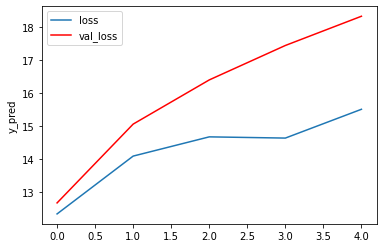

In [13]:
pipe.score()

## Lenght of Stay Prediction

In [14]:
model_config = {
    "layer_size": 128,
    "input_dim": 59,
    "depth": 1,
    "dropout_rate": 0,
    "task": "length_of_stay"
}

pipeline_config = {
    "model_name": "lstm_default",
    "batch_size": 8,
    "epochs": 5,
    "validation_fraction_split": 0.2,
    "test_fraction_split": 0.2,
    "task": "length_of_stay",
    "output_type": "one-hot",
    "compiler_config" : {
        "optimizer": "adam",
        "metrics": ["accuracy"],
        "loss": "categorical_crossentropy",
        "run_eagerly": True
    }
}

In [15]:
model = LSTMNetwork(**model_config)
pipe = pipeline.MIMICPipeline(model, **pipeline_config)
model, history = pipe.fit(timeseries,
                          episodic_data,
                          subject_diagnoses,
                          subject_icu_history)

INFO - 2022-07-31 13:02:05:pipeline/mimic.py:L 132 - Preprocessing data.
INFO - 2022-07-31 13:02:07:pipeline/mimic.py:L 147 - Done.
INFO - 2022-07-31 13:02:07:pipeline/mimic.py:L 148 - Splitting Dataset.
INFO - 2022-07-31 13:02:07:pipeline/mimic.py:L 106 - Done.
INFO - 2022-07-31 13:02:07:pipeline/mimic.py:L 112 - Starting model run for model: lstm_default!
INFO - 2022-07-31 13:02:09:preprocessing/__init__.py:L 464 - Done computing new normalizer in 1.3967103958129883!
Model: "lstm_network_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x (InputLayer)              [(None, None, 59)]        0         
                                                                 
 masking_3 (Masking)         (None, None, 59)          0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               96256     
                                        

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/length_of_stay/cp-0001.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/length_of_stay/cp-0001.ckpt/assets


836/836 [==============================] - 37s 45ms/step - loss: 1.8138 - accuracy: 0.3903 - val_loss: 2.2318 - val_accuracy: 0.2864 - lr: 0.0010
Epoch 2/5
835/836 [============================>.] - ETA: 0s - loss: 1.5782 - accuracy: 0.4518

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/length_of_stay/cp-0002.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/length_of_stay/cp-0002.ckpt/assets


836/836 [==============================] - 37s 45ms/step - loss: 1.5763 - accuracy: 0.4525 - val_loss: 2.5879 - val_accuracy: 0.2757 - lr: 0.0010
Epoch 3/5
836/836 [==============================] - ETA: 0s - loss: 1.3985 - accuracy: 0.5182

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/length_of_stay/cp-0003.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/length_of_stay/cp-0003.ckpt/assets


836/836 [==============================] - 39s 47ms/step - loss: 1.3985 - accuracy: 0.5182 - val_loss: 3.0267 - val_accuracy: 0.2830 - lr: 0.0010
Epoch 4/5
836/836 [==============================] - ETA: 0s - loss: 1.2352 - accuracy: 0.5692

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/length_of_stay/cp-0004.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/length_of_stay/cp-0004.ckpt/assets


836/836 [==============================] - 46s 55ms/step - loss: 1.2352 - accuracy: 0.5692 - val_loss: 3.0577 - val_accuracy: 0.2733 - lr: 0.0010
Epoch 5/5
835/836 [============================>.] - ETA: 0s - loss: 1.1072 - accuracy: 0.5991

INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/length_of_stay/cp-0005.ckpt/assets


INFO:tensorflow:Assets written to: /work/model/mimic/lstm_default/length_of_stay/cp-0005.ckpt/assets


836/836 [==============================] - 48s 57ms/step - loss: 1.1074 - accuracy: 0.5985 - val_loss: 3.3147 - val_accuracy: 0.2757 - lr: 0.0010
INFO - 2022-07-31 13:05:36:pipeline/mimic.py:L 256 - Training complete.


In [16]:
y_pred, y_true = pipe.predict()